# Dissertation Code

Created on Fri Feb 16 14:32:43 2018

@author: william holtam

This project applies a Monte Carlo Simulation, a technique that is commonly used in Physics to a non-physics application: creating future population projections of the UK. Population projections were created for the period 2016 – 2041 for four net migration scenarios: natural change i.e. no net migration; the current government target; a scenario half way between the current government target and current levels; and current levels. Each scenario has been run for ten thousand iterations, with variables randomly sampled from normal distributions for each year projected in each iteration. Population projections were created with uncertainty, and further analysis on the contribution of demographic change to National Health Service (NHS) spending and the burden of ageing on the working population was conducted. All population projections showed an increase in total population over the projected period; and projections with higher migration predicted much higher total population at the projected horizon. The natural change scenario shows that the total population decreases in size from the year 2037. Although the population demographic changes in all scenarios are projected to require significant increases in NHS net expenditure, the model predicts that there will be a decrease in NHS spending as a proportion of total government receipts. Gross Domestic Product (GDP), is a metric which “measures the size of a country’s economy” [1]. According to [2], health spending is projected to increase as a proportion GDP due to factors not considered in this
model, such as rises in income and improvements in technology. It was found that the Old Age Dependency Ratio (OADR) which represents the number of people over pension age per hundred people of working age, increased for all scenarios investigated. However, the OADR began to plateau at the projection horizon, and was lower, for the current scenario, than the other scenarios investigated. A higher OADR is an indicator of the population above pension age placing a larger financial burden on the working population compared to a lower OADR. 

## Import Libraries

In [98]:
import sys  # For checking the current version of python etc
import os  # For checking the current directory
import math
import numpy as np  # For using array data structures
import pandas as pd  # For importing data as dataframe structures
import matplotlib.pyplot as plt  # For creating charts e.g. histograms
import matplotlib.lines as mlines  # For creating charts e.g. histograms
import matplotlib.patches as mpatches  # For creating chart legends
import matplotlib.ticker as mtick  # For altering tick marks on charts
import time
from matplotlib import style
from numpy import diff
import plotly as plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as FF
from plotly.grid_objs import Grid, Column

MIT Essay on Automation: https://cran.r-project.org/web/packages/lifecontingencies/vignettes/mortality_projection.pdf

In [99]:
start_time = time.time()

Sign in to Plotly API

In [100]:
user = 'wh00079'
key = 'L0uVmAyLfEsbb2aMX3LV'

tls.set_credentials_file(
    username=user,
    api_key=key
)

Print system information

In [101]:
cwd = os.getcwd()
print(cwd, "\n")

win = sys.getwindowsversion()
print(win, "\n")

python_ver = sys.version
print(python_ver, "\n")

plotly_ver = plotly.__version__
print('Plotly version:', plotly_ver)

C:\Users\willi\Google Drive\Documents\Career\Experience\Datalytyx\Dissertation Code 

sys.getwindowsversion(major=10, minor=0, build=17134, platform=2, service_pack='') 

3.6.6 |Anaconda custom (64-bit)| (default, Jun 28 2018, 11:27:44) [MSC v.1900 64 bit (AMD64)] 

Plotly version: 3.4.0


Set style parameters for graphs

In [102]:
small_size = 8
medium_size = 10
bigger_size = 12

plt.rc('font', size=small_size)  # controls default text sizes
plt.rc('axes', titlesize=small_size)  # fontsize of the axes title
plt.rc('axes', labelsize=medium_size)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=small_size)  # fontsize of the tick labels
plt.rc('ytick', labelsize=small_size)  # fontsize of the tick labels
plt.rc('legend', fontsize=small_size)  # legend fontsize
plt.rc('figure', titlesize=bigger_size)  # fontsize of the figure title
plt.rcParams['grid.color'] = 'grey'
dpi = 600

Import Data

## Think about using the Pathlib library

In [103]:
data = pd.read_csv(
    'Population.csv',
    delimiter=',',
    skiprows=2,
    header=None
).values

m_pop_original = data[0, :].tolist()
f_pop_original = data[1, :].tolist()
m_prob_death_original = data[2, :].tolist()
f_prob_death_original = data[3, :].tolist()

# Number of live births 2016
children_born = m_pop_original[0] + f_pop_original[0]
# Female population aged 15 to 44
f_between_15_and_44 = sum(f_pop_original[15:45])
# General Fertility Rate - Do not recalculate each year as it has plateaued.
GFR = children_born / f_between_15_and_44

# The same number due to ONS standard for ratio.
m_spa = 65  # male state pension age
f_spa = 65  # female state pension age

working_age = (
    np.sum(m_pop_original[16:int(m_spa)]) +
    np.sum(f_pop_original[16:int(f_spa)])
)

over_pension_age = (
    np.sum(m_pop_original[m_spa:]) +
    np.sum(f_pop_original[f_spa:])
)

child_age = (
    np.sum(m_pop_original[0:16]) +
    np.sum(f_pop_original[0:16])
)

ADR_original = (over_pension_age + child_age)/working_age*100
OADR_original = over_pension_age/(working_age)*100

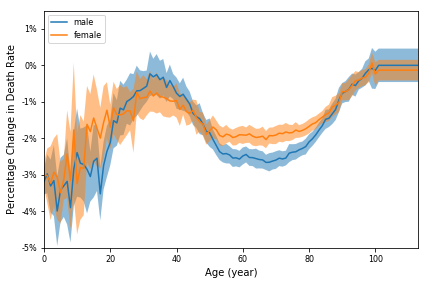

In [104]:
x_axis = np.arange(114).tolist()
# % Change in death rate for each age per year
m_mean_change_prob_death = data[6, :]
# Standard Error in male death rate
m_std_err_death = data[7, :]
# % Change in death rate for each age per year
f_mean_change_prob_death = data[8, :]
# Standard Error in male death rate
f_std_err_death = data[9, :]
# Standard Devaition in male death rate
m_std_dev_death = data[10, :]
# Standard Deviation in female death rate
f_std_dev_death = data[11, :]

m_ymin = m_mean_change_prob_death - m_std_err_death
m_ymax = m_mean_change_prob_death + m_std_err_death

f_ymin = f_mean_change_prob_death - f_std_err_death
f_ymax = f_mean_change_prob_death + f_std_err_death

fig, ax = plt.subplots()

plt.plot(
    x_axis,
    m_mean_change_prob_death,
    label='male'
)

plt.plot(
    x_axis,
    f_mean_change_prob_death,
    label='female'
)

plt.fill_between(
    x_axis,
    m_ymax,
    m_ymin,
    alpha=0.5
)

plt.fill_between(
    x_axis,
    f_ymax,
    f_ymin,
    alpha=0.5
)

# plt.grid(True)
plt.xlabel("Age (year)")
plt.ylabel("Percentage Change in Death Rate")
plt.xlim([0, x_axis[-1]])
plt.ylim([-0.05, 0.015])

plt.gca().set_yticklabels([
    '{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()
])

plt.legend(loc=2)
plt.tight_layout()
plt.savefig("Annual Percentage Change in Death Rate.png", dpi=dpi)
plt.show()

In [132]:
m_upper_bound = go.Scatter(
    name='Male Upper Bound',
    x=x_axis,
    y=m_ymax,
    mode='lines',
    marker=dict(color='rgba(0,100,80,0.2)'),
    line=dict(width=0),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty'
)

m_trace = go.Scatter(
    name='male',
    x=x_axis,
    y=m_mean_change_prob_death,
    mode='lines',
    line=dict(color='rgb(31, 119, 180)'),
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty'
)

m_lower_bound = go.Scatter(
    name='Male Lower Bound',
    x=x_axis,
    y=m_ymin,
    marker=dict(color='rgba(0,100,80,0.2)'),
    line=dict(width=0),
    mode='lines'
)

f_upper_bound = go.Scatter(
    name='Female Upper Bound',
    x=x_axis,
    y=f_ymax,
    mode='lines',
    marker=dict(color='rgba(0,100,80,0.2)'),
    line=dict(width=0),
    fillcolor='rgba(0,100,80,0.3)',
    fill='tonexty'
)

f_trace = go.Scatter(
    name='female',
    x=x_axis,
    y=f_mean_change_prob_death,
    mode='lines',
    line=dict(color='rgb(0,100,80)'),
    fillcolor='rgba(0,100,80,0.2)',
    fill='tonexty'
)

f_lower_bound = go.Scatter(
    name='Female Lower Bound',
    x=x_axis,
    y=f_ymin,
    marker=dict(color='rgba(0,100,80,0.2)'),
    line=dict(width=0),
    mode='lines'
)

data = [
    f_lower_bound,
    f_trace,
    f_upper_bound,
    m_lower_bound,
    m_trace,
    m_upper_bound
]

layout = go.Layout(
    yaxis=dict(title='Rate of Change in Death Rate'),
    xaxis=dict(title='Age (year)'),
    title='Annual Percentage Change in Death Rate',
    showlegend=True)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Annual Percentage Change in Death Rate')

Functions to help with axis labels

In [106]:
# =============================================================================
# def billions(x, pos):
#     return '£%1.0fbn' % (x*1e-9)
# =============================================================================
def tentoelevenpower(x, pos):
    return r'£%1.1f $\times 10^{11}$' % (x*1e-11)


def tentotenthpower(x, pos):
    return r'£%1.1f $\times 10^{10}$' % (x*1e-10)


def billions(x, pos):
    return r'£%1.1f $\times 10^{9}$' % (x*1e-9)


def tentoseventhpower(x, f_between_15_and_44):
    return format(r'%1.1f $\times 10^{7}$' % (x*1e-7))

# =============================================================================
# def millions(x, f_between_15_and_44):
#     return format(r'%1.1f $\times 10^{6}$' % (x*1e-6))
# =============================================================================

def millions(x, f_between_15_and_44):
    return format(r'%1.1f' % (x*1e-6))


def hunthou(x, f_between_15_and_44):
    return format(r'%1.1f $\times 10^{5}$' % (x*1e-5))

Migration Chart

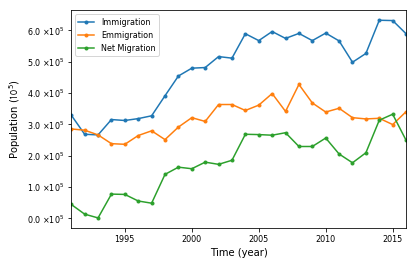

In [107]:
data = pd.read_csv("Migration Chart.csv")

fig, ax = plt.subplots()

plt.plot(
    data['Year'],
    data['Immigration']*1000,
    label='Immigration',
    marker="."
)

plt.plot(
    data['Year'],
    abs(data['Emmigration']*1000),
    label='Emmigration',
    marker="."
)

plt.plot(
    data['Year'],
    abs(data['Net Migration']*1000),
    label='Net Migration',
    marker="."
)

# plt.grid(True)
plt.xlabel("Time (year)")
plt.ylabel(r"Population $(\mathcal{10}^5)$")  # $(\mathcal{1x10}^5)$")
plt.xlim(1991, 2016)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(hunthou))
# =============================================================================
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
# =============================================================================
plt.legend(loc=2)
plt.savefig("UK Historic Migration Timeseries", dpi=dpi)
plt.show()

Life Expectancy Chart

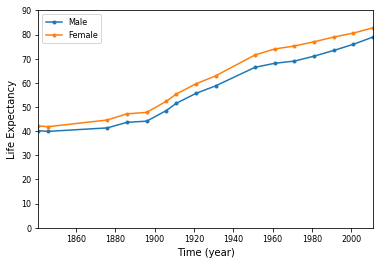

In [108]:
data = pd.read_csv("life_expectancy_1841-20111 historic timeseries.csv")

plt.plot(
        data['Year'],
        data['Male'],
        label='Male',
        marker="."
        )

plt.plot(
        data['Year'],
        data['Female'],
        label='Female',
        marker="."
        )

# plt.grid(True)
plt.xlabel("Time (year)")
plt.ylabel("Life Expectancy")
plt.xlim(1841, 2011)
plt.ylim(0, 90)
plt.legend(loc=2)
plt.savefig("UK Historic Life Expectancy Timeseries", dpi=dpi)
plt.show()

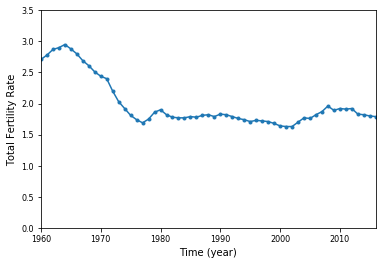

In [109]:
data = pd.read_csv("Fertility Rate chart.csv")

plt.plot(
    data['Year'],
    data['TFR'],
    label="Total Fertility Rate",
    marker="."
)

plt.xlabel("Time (year)")
plt.ylabel("Total Fertility Rate")
plt.ylim(0, 3.5)
# plt.grid(True)
plt.xlim(1960, 2016)
plt.savefig("UK Historic FR Timeseries", dpi=dpi)
plt.show()

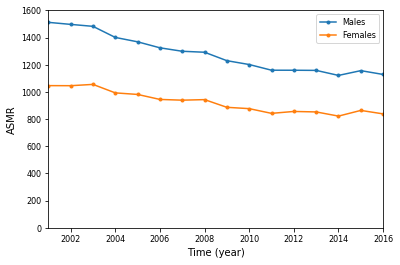

In [110]:
data = pd.read_csv(
    "Figure_2__Age-standardised_mortality_" +
    "rates_(ASMRs),_2001_to_2016_chart.csv"
)

plt.plot(
    data['Year'],
    data['Males'],
    label="Males",
    marker="."
)

plt.plot(
    data['Year'],
    data['Females'],
    label="Females",
    marker="."
)

plt.xlabel("Time (year)")
plt.ylabel("ASMR")
# plt.grid(True)
plt.xlim(2001, 2016)
plt.ylim(0, 1600)
plt.legend()
plt.savefig("UK Historic ASMR Timeseries", dpi=dpi)
plt.show()

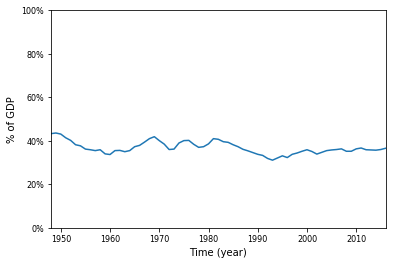

In [111]:
data = pd.read_csv("Tax Receipts as Proportion of GDP.csv")

plt.plot(
    data['Year'],
    data['Tax Receipts'],
    label='Tax Receipts as % of GDP',
    # marker="."
)

# plt.grid(True)
plt.xlabel("Time (year)")
plt.ylabel("% of GDP")
plt.xlim(1948, 2016)
plt.ylim(0, 100)

plt.gca().set_yticklabels([
        '{:.0f}%'.format(x) for x in plt.gca().get_yticks()
])

plt.savefig("UK Historic Tax Receipts as % of GDP Timeseries", dpi=dpi)
plt.show()

Create a list of age-groups

In [112]:
age_groups = []

for i in np.arange(0, 99, 5):
    start, end = 0+i, 4+i
    age_groups.append(str(start)+"-"+str(end))
    
age_groups.append("100+")

age_list = list(range(0, 114))
age_list.extend(age_list)

Import NHS Admissions Data

In [113]:
NHS_data = pd.read_csv(
    'NHS Admissions1.csv',
    delimiter=',',
    skiprows=1,
    header=None
).values

NHS_admissions = NHS_data[0]
NHS_net_expenditure = 120512e6
# https://www.gov.uk/government/uploads/system/uploads/attachment_data/file/630570/60243_PESA_Accessible.pdf
# http://www.nhsconfed.org/resources/key-statistics-on-the-nhs

NHS_age_groups = ['0', '1-4', '5-9', '10-14', '15', '16', '17', '18', '19']

for i in np.arange(20, 89, 5):
    start, end = 0+i, 4+i
    NHS_age_groups.append(str(start)+"-"+str(end))
    
NHS_age_groups.append("90+")

total_pop_using_NHS_age_groups = []
total_data = (np.array(m_pop_original) + np.array(f_pop_original)).tolist()
total_pop_using_NHS_age_groups.append(total_data[0])
total_pop_using_NHS_age_groups.append(sum(total_data[1:5]))
total_pop_using_NHS_age_groups.append(sum(total_data[5:10]))
total_pop_using_NHS_age_groups.append(sum(total_data[10:15]))

for j in np.arange(15, 20):
    total_pop_using_NHS_age_groups.append(total_data[j])
    
for i in np.arange(20, 90, 5):
    total_pop_using_NHS_age_groups.append(sum(total_data[(0+i):(5+i)]))
    
total_pop_using_NHS_age_groups.append(sum(total_data[90:]))

NHS_admis_prop_of_total_pop = (NHS_admissions /
                               np.array(total_pop_using_NHS_age_groups))

NHS_adm_of_pop = []
NHS_adm_of_pop.append(NHS_admis_prop_of_total_pop[0])

for i in np.arange(4):
    NHS_adm_of_pop.append(NHS_admis_prop_of_total_pop[1])
    
for i in np.arange(5):
    NHS_adm_of_pop.append(NHS_admis_prop_of_total_pop[2])
    
for i in np.arange(5):
    NHS_adm_of_pop.append(NHS_admis_prop_of_total_pop[3])
    
for j in np.arange(4, 9):
    NHS_adm_of_pop.append(NHS_admis_prop_of_total_pop[j])
    
for j in np.arange(9, 23):
    for i in np.arange(5):
        NHS_adm_of_pop.append(NHS_admis_prop_of_total_pop[j])
        
for i in np.arange(23, 47):
    NHS_adm_of_pop.append(NHS_admis_prop_of_total_pop[23])

NHS_admissions_by_age = np.array(NHS_adm_of_pop)*total_data

NHS_cost_by_age_original = (
    NHS_admissions_by_age*NHS_net_expenditure /
    sum(NHS_admissions)).tolist()

NHS_cost_original = sum(NHS_cost_by_age_original)

Input Immigration Stats

In [114]:
count = 0

m_migration_age_groups = []
f_migration_age_groups = []

for i in [m_migration_age_groups, f_migration_age_groups]:
    if count == 0:
        pop = m_pop_original
        
    else:
        pop = f_pop_original
    i.append(sum(pop[0:15]))
    i.append(sum(pop[15:25]))
    i.append(sum(pop[25:45]))
    
    if (count == 0):
        i.append(sum(pop[45:65]))
        i.append(sum(pop[65:]))
        
    else:
        i.append(sum(pop[45:60]))
        i.append(sum(pop[60:]))
        
    count += 1

migration_data = pd.read_csv("migration data.csv", header=None).values
m_emigration_short_mean = np.array(migration_data[2])*1000
f_emigration_short_mean = np.array(migration_data[3])*1000

m_emigration_std_dev = np.array(migration_data[4])*1000
f_emigration_std_dev = np.array(migration_data[5])*1000

# =============================================================================
# m_immigration_short = np.array([22, 108, 160, 19, 4], dtype=np.float64)*1000
# f_immigration_short = np.array([14, 113, 127, 18, 3], dtype=np.float64)*1000
# =============================================================================

m_immigration_short = np.array(migration_data[0])*1000
f_immigration_short = np.array(migration_data[1])*1000

m_emigration_short_2016 = np.array(migration_data[6])*1000
f_emigration_short_2016 = np.array(migration_data[7])*1000

# =============================================================================
# immigration_scenario = []
# immigration_scenarios_numbers = [0, 99999, 1]
# for scenario in immigration_scenarios_numbers:
#     m_immigration_temp = []
#     f_immigration_temp = []
#     if scenario != 1:
#         for i in range(5):
#             m_immigration_temp.append(((
#                     m_immigration_short[i] -
#                     m_emigration_short[i])*scenario) /
#                     sum(m_immigration_short))
#
#         for i in range(5):
#             f_immigration_temp.append(((
#                     f_immigration_short[i] -
#                     f_emigration_short[i])*scenario) /
#                     sum(f_immigration_short))
#
#     if scenario == 1:
#         m_immigration_proportion = m_immigration_short / np.array(
#                 m_migration_age_groups, dtype=np.float64)
#         f_immigration_proportion = f_immigration_short/np.array(
#                 f_migration_age_groups, dtype=np.float64)
#     else:
#         m_immigration_proportion = m_immigration_temp/np.array(
#                 m_migration_age_groups, dtype=np.float64)
#         f_immigration_proportion = f_immigration_temp/np.array(
#                 f_migration_age_groups, dtype=np.float64)
#
#     count = 0
#     m_immigration = []
#     f_immigration = []
#     for j in [m_immigration, f_immigration]:
#         if count == 0:
#             immigration_proportion = m_immigration_proportion
#             pop = m_pop_original
#         else:
#             immigration_proportion = f_immigration_proportion
#             pop = f_pop_original
#         for i in range(15):
#             j.append(pop[i]*immigration_proportion[0])
#         for i in range(15, 25):
#             j.append(pop[i]*immigration_proportion[1])
#         for i in range(25, 45):
#             j.append(pop[i]*immigration_proportion[2])
#         if count == 0:
#             for i in range(45, 65):
#                 j.append(pop[i]*immigration_proportion[3])
#             for i in range(65, 114):
#                 j.append(pop[i]*immigration_proportion[4])
#         else:
#             for i in range(45, 60):
#                 j.append(pop[i]*immigration_proportion[3])
#             for i in range(60, 114):
#                 j.append(pop[i]*immigration_proportion[4])
#         count += 1
#     immigration_scenario.append([m_immigration, f_immigration])
# =============================================================================

Tax Receipts and GDP

In [115]:
# Tax receipts are proportional to GDP
# Data from PSF_aggregates_databank_February_2018
# tax_receipts_percent_of_GDP = 0.3679078
tax_receipts_percent_of_GDP_mean = 0.3679710145
tax_receipts_percent_of_GDP_std_dev = 0.02790739466

# Purchinsing Power Parity conversion between GDP and USD
USD_to_GDP_PPP = 0.701615

GDP_forecast_data = pd.read_csv(
    'GDP.csv',
    delimiter=',',
    skiprows=1,
    names=["Year", "GDP"],
    usecols=[5, 6],
)  # Data from OECD long term forecast

GDP_forecast = GDP_forecast_data["GDP"] * USD_to_GDP_PPP * 1000000
tax_receipts_percent_of_GDP_original = 0.366
tax_receipts_forecast = GDP_forecast * tax_receipts_percent_of_GDP_original

NHS_cost_proportion_of_GDP_2016 = NHS_cost_original / GDP_forecast[0]
NHS_cost_proportion_of_tax_2016 = NHS_cost_original / tax_receipts_forecast[0]

Create Population Pyramid of Initial Population

In [116]:
plotly_pyramid_plot_nat_change = []
plotly_pyramid_plot_10000 = []
plotly_pyramid_plot_mid = []
plotly_pyramid_plot_current = []

total_pop_original = sum(m_pop_original)+sum(f_pop_original)

pop = [-x for x in m_pop_original]
pop.extend(f_pop_original)

sex = []
year_list = []

for i in range(len(pop)):
    year_list.append(2016)
    
    if i < (len(pop)/2):
        sex.append('Male')
        
    else:
        sex.append('Female')

df1 = pd.DataFrame({
    'Year': year_list,
    'Age': age_list,
    'Sex': sex,
    'Pop': pop
})

df1 = df1.assign(abs_pop=[abs(x) for x in pop])
plotly_pyramid_plot_nat_change.append(df1)
plotly_pyramid_plot_10000.append(df1)
plotly_pyramid_plot_mid.append(df1)
plotly_pyramid_plot_current.append(df1)

f_trunk_original = []
m_trunk_original = []

for i in np.arange(0, 99, 5):
    start, end = 0+i, 4+i
    m_trunk_original.append(sum(m_pop_original[start:end]))
    f_trunk_original.append(sum(f_pop_original[start:end]))

m_trunk_original.append(sum(m_pop_original[100:]))
f_trunk_original.append(sum(f_pop_original[100:]))

pyramid_original = []

for i in range(len(age_groups)):
    temp = []
    temp.append(age_groups[i])
    temp.append(m_trunk_original[i])
    temp.append(f_trunk_original[i])
    pyramid_original.append(temp)

# Useful Notes: https://github.com/afolaborn/Python_Jupyter_Notebook/blob/
# master/Population-Pyramid/Population_Pyramid_Final.ipynb

The Model

In [117]:
GFR_mean = 60.7625/1000
GFR_std_dev = 2.68688365/1000

# inflation = 0.02
x = 25  # Year of forecast to plot
itter = 10000  # Number of itterations to run through
immigration_scenarios_numbers = [0, 99999, 174500, 1]

sex_ratio_mean = 1052/1000
sex_ratio_std_dev = 2.48/1000

pyramid_scenario_list = []
NHS_cost_proportion_of_tax_scenario_list = []
NHS_cost_proportion_of_GDP_scenario_list = []
NHS_cost_scenarios = []
NHS_cost_pp_scenarios = []
f_timeseries_scenarios = []
m_timeseries_scenarios = []
timeseries_scenarios = []
ADR_scenarios = []
OADR_scenarios = []
NHS_cost_proportion_of_tax_std_err_scenarios = []
NHS_cost_proportion_of_GDP_std_err_scenarios = []
total_NHS_cost_std_err_scenarios = []
NHS_cost_per_person_std_err_scenarios = []
m_timeseries_std_err_scenarios = []
f_timeseries_std_err_scenarios = []
avg_timeseries_std_err_scenarios = []
ADR_list_std_err_scenarios = []
OADR_list_std_err_scenarios = []
m_trunk_list_std_err_scenarios = []
f_trunk_list_std_err_scenarios = []
total_NHS_cost_scenarios = []
NHS_cost_proporiton_of_tax_scenario_list_std_dev = []
ADR_list_std_dev_scenarios = []
OADR_list_std_dev_scenarios = []
total_NHS_cost_std_dev_scenarios = []
NHS_cost_PP_std_dev_scenarios = []
timeseries_std_dev_scenarios = []
m_timeseries_std_dev_scenarios = []
f_timeseries_std_dev_scenarios = []
m_trunk_std_dev_scenarios = []
f_trunk_std_dev_scenarios = []
total_pop_std_dev_scenarios = []
total_pop_avg_scenarios = []
count = 0

for scenario in range(len(immigration_scenarios_numbers)):
    m_timeseries_itter = []
    f_timeseries_itter = []
    timeseries_itter = []
    total_NHS_cost_itter = []
    NHS_cost_per_person_itter = []
    NHS_cost_proportion_of_tax_itter = []
    NHS_cost_proportion_of_GDP_itter = []
    pyramid_list_itter = []
    ADR_list_itter = []
    OADR_list_itter = []
    m_trunk_list_itter = []
    f_trunk_list_itter = []
    total_pop_list_itter = []
    
    for k in range(itter):
        m_timeseries = [m_pop_original]
        f_timeseries = [f_pop_original]
        f_pop = f_pop_original[:]
        m_pop = m_pop_original[:]
        total_NHS_cost = [NHS_cost_original]
        NHS_cost_per_person = [NHS_cost_by_age_original]
        NHS_cost_proportion_of_tax = [NHS_cost_proportion_of_tax_2016]
        NHS_cost_proportion_of_GDP = [NHS_cost_proportion_of_GDP_2016]
        pyramid_list = [pyramid_original]
        ADR_list = [ADR_original]
        OADR_list = [OADR_original]
        m_prob_death = m_prob_death_original[:]
        f_prob_death = f_prob_death_original[:]
        m_trunk_list = [np.array(m_trunk_original)]
        f_trunk_list = [np.array(f_trunk_original)]
        total_pop_list = [total_pop_original]

        for j in np.arange(x):

            tax_receipts_percent_of_GDP = np.random.normal(
                tax_receipts_percent_of_GDP_mean,
                tax_receipts_percent_of_GDP_std_dev
            )

            tax_receipts_forecast = GDP_forecast * tax_receipts_percent_of_GDP

            m_change_prob_death = np.random.normal(
                m_mean_change_prob_death,
                m_std_dev_death
            )

            f_change_prob_death = np.random.normal(
                f_mean_change_prob_death,
                f_std_dev_death
            )

            GFR = np.random.normal(
                GFR_mean,
                GFR_std_dev
            )

            sex_ratio = np.random.normal(
                sex_ratio_mean,
                sex_ratio_std_dev
            )

            m_emigration_short = np.random.normal(
                m_emigration_short_mean,
                m_emigration_std_dev
            )

            f_emigration_short = np.random.normal(
                f_emigration_short_mean,
                f_emigration_std_dev
            )

            m_emigration_proportion = m_emigration_short/np.array(
                m_migration_age_groups, dtype=np.float64
            )

            m_emigration_proportion_2016 = m_emigration_short_2016/np.array(
                m_migration_age_groups, dtype=np.float64
            )

            f_emigration_proportion = f_emigration_short/np.array(
                f_migration_age_groups, dtype=np.float64
            )

            f_emigration_proportion_2016 = f_emigration_short_2016/np.array(
                f_migration_age_groups, dtype=np.float64
            )

            count_temp = 0
            m_emigration = []
            f_emigration = []

            for l in range(2): 
                if scenario == 3:
                    f_emigration_proportion_temp = f_emigration_proportion_2016
                    m_emigration_proportion_temp = m_emigration_proportion_2016
                    
                else:
                    f_emigration_proportion_temp = f_emigration_proportion
                    m_emigration_proportion_temp = m_emigration_proportion
                    
                if count_temp == 0:
                    emigration = m_emigration
                    pop = m_pop_original
                    emigration_proportion = m_emigration_proportion_temp
                    
                else:
                    emigration = f_emigration
                    pop = f_pop_original
                    emigration_proportion = f_emigration_proportion_temp
                    
                for i in range(15):
                    emigration.append(pop[i]*emigration_proportion[0])
                    
                for i in range(15, 25):
                    emigration.append(pop[i]*emigration_proportion[1])
                    
                for i in range(25, 45):
                    emigration.append(pop[i]*emigration_proportion[2])
                    
                    
                if count_temp == 0:
                    for i in range(45, 65):
                        emigration.append(pop[i]*emigration_proportion[3])
                        
                    for i in range(65, 114):
                        emigration.append(pop[i]*emigration_proportion[4])
                        
                else:
                    for i in range(45, 60):
                        emigration.append(pop[i]*emigration_proportion[3])
                        
                    for i in range(60, 114):
                        emigration.append(pop[i]*emigration_proportion[4])
                        
                count_temp += 1

            m_immigration_short = np.array(migration_data[0])*1000
            f_immigration_short = np.array(migration_data[1])*1000

#            work out percentage ratio of immigraion for men and women and
            m_immigration_percentage = (
                m_immigration_short / (
                    m_immigration_short +
                    f_immigration_short
                )
            )

            m_immigration_age_dist = []

            for i in range(5):
                m_immigration_age_dist.append(
                        m_immigration_short[i]/sum(m_immigration_short)
                        )

            f_immigration_percentage = (
                f_immigration_short / (
                    m_immigration_short +
                    f_immigration_short
                )
            )

            f_immigration_age_dist = []

            for i in range(5):
                f_immigration_age_dist.append(
                    f_immigration_short[i]/
                    sum(f_immigration_short)
                )

            immigration_scenario = []
            
            for scenario_im in immigration_scenarios_numbers:
                m_immigration_temp = []
                f_immigration_temp = []

                if scenario_im != 1:
                    for i in range(5):
                        m_immigration_temp.append(
                            m_immigration_percentage[i] *
                            m_immigration_age_dist[i] *
                            scenario_im
                            + m_emigration_short[i]
                        )

                    for i in range(5):
                        f_immigration_temp.append(
                            f_immigration_percentage[i] *
                            f_immigration_age_dist[i] *
                            scenario_im
                            + f_emigration_short[i]
                        )

                if scenario_im == 1:
                    m_immigration_proportion = m_immigration_short / np.array(
                        m_migration_age_groups, dtype=np.float64
                    )
                    
                    f_immigration_proportion = f_immigration_short/np.array(
                        f_migration_age_groups, dtype=np.float64
                    )

                else:
                    m_immigration_proportion = m_immigration_temp/np.array(
                        m_migration_age_groups, dtype=np.float64
                    )
                    
                    f_immigration_proportion = f_immigration_temp/np.array(
                        f_migration_age_groups, dtype=np.float64
                    )

                count_temp = 0
                m_immigration = []
                f_immigration = []
                
                for l in [m_immigration, f_immigration]:
                    if count_temp == 0:
                        immigration_proportion = m_immigration_proportion
                        pop = m_pop_original
                        
                    else:
                        immigration_proportion = f_immigration_proportion
                        pop = f_pop_original
                        
                    for i in range(15):
                        l.append(pop[i]*immigration_proportion[0])
                        
                    for i in range(15, 25):
                        l.append(pop[i]*immigration_proportion[1])
                        
                    for i in range(25, 45):
                        l.append(pop[i]*immigration_proportion[2])
                        
                    if count_temp == 0:
                        for i in range(45, 65):
                            l.append(pop[i]*immigration_proportion[3])
                            
                        for i in range(65, 114):
                            l.append(pop[i]*immigration_proportion[4])
                            
                    else:
                        for i in range(45, 60):
                            l.append(pop[i]*immigration_proportion[3])
                            
                        for i in range(60, 114):
                            l.append(pop[i]*immigration_proportion[4])
                            
                    count_temp += 1
                    
                immigration_scenario.append([m_immigration, f_immigration])

# =============================================================================
#             if k == 1:
#                 print(
#                         "Total Immigraion is: ",
#                         sum(m_immigration),
#                         sum(f_immigration)
#                             )
# =============================================================================

            f_temp = [0]
            m_temp = [0]
        
            for i in np.arange(1, len(m_pop)+1):
                f_temp.append(f_pop[i-1])
                m_temp.append(m_pop[i-1])

            m_pop = m_temp
            f_pop = f_temp

# =============================================================================
#             GFR = np.random.normal(GFR_mean, GFR_std_dev)
# =============================================================================

            f_between_15_and_44 = sum(f_pop[15:45])

            children_born = int(GFR*f_between_15_and_44)

            f_pop[0] = children_born*1/(1+sex_ratio)
            m_pop[0] = children_born*sex_ratio/(1+sex_ratio)

            del f_pop[114]
            del m_pop[114]

#           How much the death rate is expected to change per year for each age
# =============================================================================
#             m_prob_death = m_prob_death*(1+m_change_prob_death)
#             f_prob_death = f_prob_death*(1+f_change_prob_death)
# =============================================================================

            m_prob_death *= (1+m_change_prob_death)
            f_prob_death *= (1+f_change_prob_death)

            scenario_temp = immigration_scenario[scenario]

# =============================================================================
#             if j == 24 and scenario == 0:
#                 plt.plot(np.multiply(np.array(m_pop),(1-m_prob_death)))
#
# =============================================================================
            m_pop = (
                np.multiply(np.array(m_pop), (1-m_prob_death)) +
                np.array(scenario_temp[0]) -
                np.array(m_emigration)
            ).tolist()

            f_pop = (
                np.multiply(np.array(f_pop), (1-f_prob_death)) +
                np.array(scenario_temp[1]) -
                np.array(f_emigration)
            ).tolist()

            total_pop_list.append(
                np.sum(np.array(m_pop)) +
                np.sum(np.array(f_pop))
            )

            working_age = (
                np.sum(m_pop[16:int(m_spa)]) +
                np.sum(f_pop[16:int(f_spa)])
            )

            over_pension_age = (
                np.sum(m_pop[m_spa:]) +
                np.sum(f_pop[f_spa:])
            )

            child_age = (
                np.sum(m_pop[0:16]) +
                np.sum(f_pop[0:16])
            )

            ADR = (over_pension_age + child_age) / (working_age * 100)
            OADR = over_pension_age / (working_age * 100)

            ADR_list.append(ADR)
            OADR_list.append(OADR)

            m_timeseries.append(m_pop)
            f_timeseries.append(f_pop)

            f_trunk = []
            m_trunk = []
            for i in np.arange(0, 99, 5):
                start, end = 0+i, 4+i
                m_trunk.append(sum(m_pop[start:end]))
                f_trunk.append(sum(f_pop[start:end]))
                
            m_trunk.append(sum(m_pop[100:]))
            f_trunk.append(sum(f_pop[100:]))
            m_trunk_list.append(m_trunk)
            f_trunk_list.append(f_trunk)

            total_pop = np.array(m_pop)+np.array(f_pop)

            NHS_admissions_by_age = np.array(NHS_adm_of_pop)*total_pop

            NHS_cost_by_age = (NHS_admissions_by_age * NHS_net_expenditure /
                               sum(NHS_admissions)).tolist()
            NHS_cost_per_person.append(NHS_cost_by_age)

            NHS_cost = sum(NHS_cost_by_age)
            total_NHS_cost.append(NHS_cost)

            NHS_cost_proportion_of_tax.append(
                NHS_cost /
                tax_receipts_forecast[1+j]
            )

            NHS_cost_proportion_of_GDP.append(
                NHS_cost /
                GDP_forecast[1+j]
            )

        total_pop_list_itter.append(total_pop_list)

#        plt.plot(total_pop_list)
#        plt.plot(OADR_list)

        ADR_list_itter.append(ADR_list)
        OADR_list_itter.append(OADR_list)

        NHS_cost_proportion_of_tax_itter.append(
            NHS_cost_proportion_of_tax
        )

        NHS_cost_proportion_of_GDP_itter.append(
            NHS_cost_proportion_of_GDP
        )

        total_NHS_cost_itter.append(total_NHS_cost)
        NHS_cost_per_person_itter.append(NHS_cost_per_person)
        timeseries = np.add(np.array(f_timeseries), np.array(f_timeseries))
        timeseries_itter. append(timeseries)
        f_timeseries_itter.append(f_timeseries)
        m_timeseries_itter.append(m_timeseries)
        m_trunk_list_itter.append(m_trunk_list)
        f_trunk_list_itter.append(f_trunk_list)

#    plt.ylim(6.5e7, 7.6e7)
    plt.show()

    total_pop_avg = np.mean(
        total_pop_list_itter,
        axis=0
    )

    total_pop_avg_scenarios.append(total_pop_avg)

    total_pop_std_err = np.std(
        np.array(total_pop_list_itter),
        axis=0
    ) / np.sqrt(itter)

    total_pop_list_std_dev = np.std(np.array(total_pop_list_itter), axis=0)

    total_pop_std_dev_scenarios.append(total_pop_list_std_dev)

    lower = total_pop_avg - 1.96 * total_pop_list_std_dev
    upper = total_pop_avg + 1.96 * total_pop_list_std_dev

# =============================================================================
#     fig, ax = plt.subplots()
#     plt.plot(
#             np.arange(2016, 2016+x+1),
#             total_pop_avg
#             )
#     plt.title("Monte Carlo Projection of Total UK Population Size")
#     plt.xlabel("Year")
#     plt.ylabel("Population")
#     plt.fill_between(
#             np.arange(2016, 2016+x+1),
#             lower,
#             upper,
#             alpha=0.75
#             )
#     plt.ylim(6.5e7, 7.6e7)
#     plt.show()
# =============================================================================

    NHS_cost_proportion_of_tax_avg = np.mean(
        np.array(NHS_cost_proportion_of_tax_itter),
        axis=0
    )

    NHS_cost_proportion_of_tax_std_err = np.std(
        np.array(NHS_cost_proportion_of_tax_itter),
        axis=0
    ) / np.sqrt(itter)

    NHS_cost_proportion_of_tax_std_err_scenarios.append(
        NHS_cost_proportion_of_tax_std_err
    )

    NHS_cost_proportion_of_GDP_avg = np.mean(np.array(
        NHS_cost_proportion_of_GDP_itter),
        axis=0
    )

    NHS_cost_proportion_of_GDP_std_err = np.std(np.array(
        NHS_cost_proportion_of_GDP_itter),
        axis=0
    )/np.sqrt(itter)

    NHS_cost_proportion_of_GDP_std_err_scenarios.append(
        NHS_cost_proportion_of_GDP_std_err
    )

    total_NHS_cost_avg = np.mean(np.array(total_NHS_cost_itter), axis=0)
    total_NHS_cost_scenarios.append(total_NHS_cost_avg)

    total_NHS_cost_std_err = np.std(
        np.array(total_NHS_cost_itter),
        axis=0
        ) / np.sqrt(itter)

    total_NHS_cost_std_err_scenarios.append(total_NHS_cost_std_err)

    total_NHS_cost_std_dev = np.std(
        np.array(total_NHS_cost_itter),
        axis=0
    )
    total_NHS_cost_std_dev_scenarios.append(total_NHS_cost_std_dev)

    NHS_cost_per_person_avg = np.mean(
        np.array(NHS_cost_per_person_itter),
        axis=0
    )

    NHS_cost_per_person_std_err = np.std(
        np.array(NHS_cost_per_person_itter),
        axis=0
        ) / np.sqrt(itter)

    NHS_cost_per_person_std_err_scenarios.append(NHS_cost_per_person_std_err)

    NHS_cost_per_person_std_dev = np.std(NHS_cost_per_person_itter, axis=0)
    NHS_cost_PP_std_dev_scenarios.append(NHS_cost_per_person_std_dev)

    m_timeseries_avg = np.mean(np.array(m_timeseries_itter), axis=0)
    
    m_timeseries_std_err = np.std(
        np.array(m_timeseries_itter),
        axis=0) / np.sqrt(itter)
    
    m_timeseries_std_err_scenarios.append(m_timeseries_std_err)

    m_timeseries_std_dev = np.std(np.array(m_timeseries_itter), axis=0)
    m_timeseries_std_dev_scenarios.append(m_timeseries_std_dev)

    f_timeseries_std_dev = np.std(np.array(f_timeseries_itter), axis=0)
    f_timeseries_std_dev_scenarios.append(f_timeseries_std_dev)

    f_timeseries_avg = np.mean(np.array(f_timeseries_itter), axis=0)
    
    f_timeseries_std_err = np.std(
        np.array(f_timeseries_itter),
        axis=0) / np.sqrt(itter)
    
    f_timeseries_std_err_scenarios.append(f_timeseries_std_err)

    timeseries_avg = np.mean(np.array(timeseries_itter), axis=0)
    
    avg_timeseries_std_err = np.sqrt(
        np.square(np.array(f_timeseries_std_err)) +
        np.square(np.array(m_timeseries_std_err))
    )

    avg_timeseries_std_err_scenarios.append(avg_timeseries_std_err)

    timeseries_std_dev = np.std(
        np.array(timeseries_itter),
        axis=0
    )

# =============================================================================
#     print(timeseries_std_dev[x])
# =============================================================================

    timeseries_std_dev_scenarios.append(timeseries_std_dev)

    for j in range(x):
        pop = [-x for x in m_timeseries_avg[j]]
        pop.extend(f_timeseries_avg[j])

# =============================================================================
#         std_err = m_timeseries_std_err[j].tolist()
#         std_err.extend(f_timeseries_std_err[j].tolist())
# =============================================================================

        sex = []
        year_list = []

        for i in range(len(pop)):
            year_list.append(2016+j)
            
            if i < (len(pop)/2):
                sex.append('Male')
                
            else:
                sex.append('Female')

        df1 = pd.DataFrame({
            'Year': year_list,
            'Age': age_list,
            'Sex': sex,
            'Pop': pop
        })

        df1 = df1.assign(abs_pop=[abs(x) for x in pop])

        if count == 0:
            plotly_pyramid_plot_nat_change.append(df1)
            
        elif count == 1:
            plotly_pyramid_plot_10000.append(df1)
            
        elif count == 2:
            plotly_pyramid_plot_mid.append(df1)
            
        elif count == 3:
            plotly_pyramid_plot_current.append(df1)

    ADR_list_avg = np.mean(np.array(ADR_list_itter), axis=0)
    
    ADR_list_std_err = np.std(
        np.array(ADR_list_itter),
        axis=0)/np.sqrt(itter)
    
    ADR_list_std_err_scenarios.append(ADR_list_std_err)

    ADR_list_std_dev = np.std(np.array(ADR_list_itter), axis=0)
    ADR_list_std_dev_scenarios.append(ADR_list_std_dev)

    OADR_list_avg = np.mean(np.array(OADR_list_itter), axis=0)

    OADR_list_std_err = np.std(
        np.array(OADR_list_itter),
        axis=0) / np.sqrt(itter)
    
    OADR_list_std_err_scenarios.append(OADR_list_std_err)

    OADR_list_std_dev = np.std(np.array(OADR_list_itter), axis=0)
    OADR_list_std_dev_scenarios.append(OADR_list_std_dev)

    m_trunk_list_avg = np.mean(np.array(m_trunk_list_itter), axis=0)
    
    m_trunk_list_std_err = np.std(
        np.array(m_trunk_list_itter),
        axis=0
    )/np.sqrt(itter)

    m_trunk_list_std_err_scenarios.append(m_trunk_list_std_err)
    m_trunk_list_std_dev = np.std(m_trunk_list_itter, axis=0)
    m_trunk_std_dev_scenarios.append(m_trunk_list_std_dev)
    f_trunk_list_std_dev = np.std(f_trunk_list_itter, axis=0)
    f_trunk_std_dev_scenarios.append(f_trunk_list_std_dev)
    f_trunk_list_avg = np.mean(np.array(f_trunk_list_itter), axis=0)

    f_trunk_list_std_err = np.std(
        np.array(f_trunk_list_itter),
        axis=0
    )/np.sqrt(itter)

    f_trunk_list_std_err_scenarios.append(f_trunk_list_std_err)

    pyramid_list_avg = []
    for k in range(x+1):
        m_trunk = m_trunk_list_avg[k]
        f_trunk = f_trunk_list_avg[k]
# =============================================================================
#         m_trunk_std_err = m_trunk_list_std_err[k]
#         f_trunk_std_err = f_trunk_list_std_err[k]
# =============================================================================
        pyramid_avg = []
        for i in range(len(age_groups)):
            temp = []
            temp.append(age_groups[i])
            temp.append(m_trunk[i])
            temp.append(f_trunk[i])
# =============================================================================
#             temp.append(m_trunk_std_err[i]*1.96)
#             temp.append(f_trunk_std_err[i]*1.96)
# =============================================================================
            pyramid_avg.append(temp)
        pyramid_list_avg.append(pyramid_avg)

    ADR_scenarios.append(ADR_list_avg)
    OADR_scenarios.append(OADR_list_avg)

    pyramid_scenario_list.append(pyramid_list_avg)

    NHS_cost_proportion_of_tax_scenario_list.append(
        NHS_cost_proportion_of_tax_avg
    )

    NHS_cost_proporiton_of_tax_scenario_list_std_dev.append(
        np.std(np.array(NHS_cost_proportion_of_tax_itter), axis=0)
    )

    NHS_cost_proportion_of_GDP_scenario_list.append(
        NHS_cost_proportion_of_GDP_avg
    )

    NHS_cost_scenarios.append(total_NHS_cost_avg)
    NHS_cost_pp_scenarios.append(NHS_cost_per_person_avg)
    f_timeseries_scenarios.append(f_timeseries_avg)
    m_timeseries_scenarios.append(m_timeseries_avg)
    timeseries_scenarios.append(timeseries_avg)

    count += 1

result_nat_change = pd.concat(plotly_pyramid_plot_nat_change)
result_10000 = pd.concat(plotly_pyramid_plot_10000)
result_mid = pd.concat(plotly_pyramid_plot_mid)
result_current = pd.concat(plotly_pyramid_plot_current)
result_list = [result_nat_change, result_10000, result_mid, result_current]

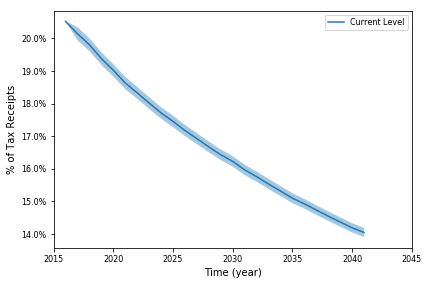

In [118]:
label = [
    "Natural Change",  # = 0",
    "Gov. Target",  # = 99,999",
    "Mid. Target",  # = 174,500",
    "Current Level",  # = 249,000"
]

# =============================================================================
# for i in range(len(immigration_scenario)):
#     uncertainty = []
#     scenario = NHS_cost_proportion_of_tax_scenario_list[i]
#     for j in range(26):
#         if j == 0:
#             uncertainty.append(0)
#         else:
#             uncertainty.append(0.01*scenario[j])
#
#     lower = (
#             NHS_cost_proportion_of_tax_scenario_list[i] -
#             np.array(uncertainty)
#             )
#
#     upper = (
#             NHS_cost_proportion_of_tax_scenario_list[i] +
#             np.array(uncertainty)
#             )
#
#     plt.plot(
#             range(2016, (2017+x)),
#             NHS_cost_proportion_of_tax_scenario_list[i],
#             label=label[i]
#             )
#
#     plt.fill_between(x=range(2016, (2017+x)), y1=lower, y2=upper, alpha=0.4)
#
# =============================================================================

uncertainty = []
scenario = NHS_cost_proportion_of_tax_scenario_list[3]
for j in range(26):
    if j == 0:
        uncertainty.append(0)
    else:
        uncertainty.append(0.01*scenario[j])

lower = (NHS_cost_proportion_of_tax_scenario_list[3] - np.array(uncertainty))

upper = (NHS_cost_proportion_of_tax_scenario_list[3] + np.array(uncertainty))

plt.plot(
    range(2016, (2017+x)),
    NHS_cost_proportion_of_tax_scenario_list[3],
    label=label[3]
)

plt.fill_between(x=range(2016, (2017+x)), y1=lower, y2=upper, alpha=0.4)

# plt.grid(True)
plt.xlim(2015, 2045)

plt.gca().set_yticklabels([
        '{:.1f}%'.format(x*100) for x in plt.gca().get_yticks()
        ])

plt.tight_layout()
plt.xlabel("Time (year)")
plt.ylabel("% of Tax Receipts")
plt.legend()
plt.xlabel("Time (year)")
plt.ylabel("% of Tax Receipts")
plt.tight_layout()
plt.savefig("NHS cost as proportion of Tax Receipts.png", dpi=dpi)
plt.show()

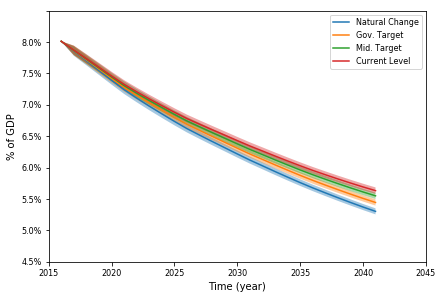

The General Fertility Rate is:  66.70324973916108


In [119]:
for i in range(len(immigration_scenario)):
    uncertainty = []
    scenario = NHS_cost_proportion_of_GDP_scenario_list[i]

    for j in range(26):
        if j == 0:
            uncertainty.append(0)

        else:
            uncertainty.append(0.01*scenario[j])

    lower = (NHS_cost_proportion_of_GDP_scenario_list[i] - np.array(uncertainty))

    upper = (NHS_cost_proportion_of_GDP_scenario_list[i] + np.array(uncertainty))

    plt.plot(
        range(2016, (2017+x)),
        NHS_cost_proportion_of_GDP_scenario_list[i],
        label=label[i]
    )

    plt.fill_between(x=range(2016, (2017+x)), y1=lower, y2=upper, alpha=0.4)

plt.gca().set_yticklabels(['{:.1f}%'.format(x*100) for x in plt.gca().get_yticks()])

plt.ylim(0.04, 0.08)
plt.xlim(2015, 2045)
plt.tight_layout()
plt.legend()

plt.savefig("NHS cost as proportion of GDP.png", dpi=dpi)

plt.xlabel("Time (year)")
plt.ylabel("% of GDP")
plt.show()

print("The General Fertility Rate is: ", GFR*1000)

# =============================================================================
# table = FF.create_table(result_zero)
# py.iplot(table, filename='pyramid-plot-animation-gapminder-data-preview2')
# =============================================================================

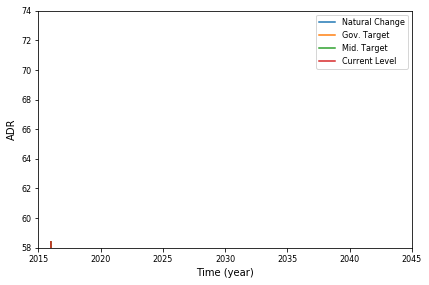

OADR Natural Change  0.004443446856857776 +/- 2.895938219314896e-05
OADR Gov. Target  0.004213312511664028 +/- 2.690224938945688e-05
OADR Mid. Target  0.00405851757976901 +/- 2.5165565545678224e-05
OADR Current Level  0.003834138800094214 +/- 2.315810023059403e-05
OADR National Change  28.5058444965976


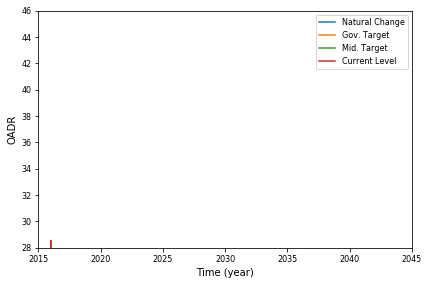

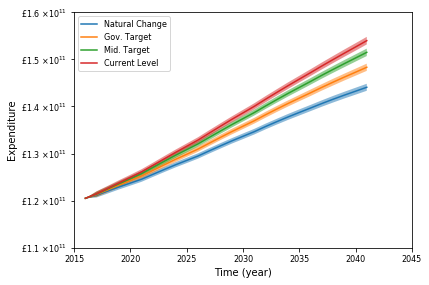

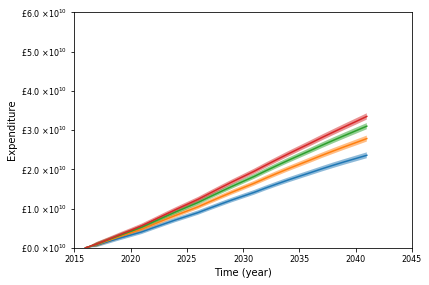

In [120]:
fig, ax = plt.subplots()
for i in range(len(immigration_scenario)):
    ADR = ADR_scenarios[i]
    ADR_std_dev = ADR_list_std_dev_scenarios[i]
    x_axis = []
    for j in range(x+1):
        x_axis.append(2016+j)
#    plt.ylim(0.0, 250e9)
#    plt.xlim(2016, 2016+x)

    lower = ADR - 1.96 * ADR_std_dev
    upper = ADR + 1.96 * ADR_std_dev

    plt.ylim(58, 74)
    plt.xlim(2015, 2045)
    plt.xlabel("Time (year)")
    plt.ylabel("ADR")
    plt.plot(x_axis, ADR, label=label[i])
    plt.fill_between(x_axis, lower, upper, alpha=0.5)
plt.tight_layout()
plt.legend()
plt.savefig("UK Population ADR Scenario.png", dpi=dpi)  # , transparent=True)
plt.show()


fig, ax = plt.subplots()
for i in range(len(immigration_scenario)):
    OADR = OADR_scenarios[i]
    OADR_std_dev = OADR_list_std_dev_scenarios[i]
    x_axis = []
    for j in range(x+1):
        x_axis.append(2016+j)
#    plt.ylim(0.0, 250e9)
#    plt.xlim(2016, 2016+x)

    lower = OADR - 1.96 * OADR_std_dev
    upper = OADR + 1.96 * OADR_std_dev

    plt.ylim(28, 46)
    plt.xlim(2015, 2045)
    plt.xlabel("Time (year)")
    plt.ylabel("OADR")
    plt.plot(x_axis, OADR, label=label[i])
    plt.fill_between(x_axis, lower, upper, alpha=0.5)

    print(
            "OADR" + " " + label[i]+" ",
            OADR[25], "+/-",
            1.96 * OADR_std_dev[25]
            )

print("OADR National Change ", OADR[0])
plt.tight_layout()
plt.legend()
plt.savefig("UK Population OADR Scenario.png", dpi=dpi)
plt.show()


# NHS Cost due to Demographic Change.
fig, ax = plt.subplots()
for i in range(len(immigration_scenarios_numbers)):
    NHS_cost = NHS_cost_scenarios[i]
    NHS_std_dev = total_NHS_cost_std_dev_scenarios[i]
    x_axis = []
    for j in range(x+1):
        x_axis.append(2016+j)
    formatter = mtick.FuncFormatter(tentoelevenpower)

    lower = NHS_cost - 1.96 * NHS_std_dev
    upper = NHS_cost + 1.96 * NHS_std_dev

    ax.yaxis.set_major_formatter(formatter)
    plt.xlim(2015, 2045)
#    plt.xlim(2016, 2016+x)
    plt.ylim(110e9, 160e9)
    plt.xlabel("Time (year)")
    plt.ylabel("Expenditure")
    plt.plot(x_axis, NHS_cost, label=label[i])
    plt.fill_between(x_axis, lower, upper, alpha=0.5)
#   This is increase in NHS cost due to population growth.
#   Look into NHS cost growth due to other factors
plt.tight_layout()
plt.legend()
plt.savefig(
        "NHS Cost due to Demographic Change Scenario.png",
        dpi=dpi
        )
plt.show()


# Change in NHS cost due to Demographic Change
fig, ax = plt.subplots()
for i in range(len(immigration_scenarios_numbers)):
    NHS_cost = NHS_cost_scenarios[i]
    NHS_std_dev = total_NHS_cost_std_dev_scenarios[i]
    x_axis = []
    for j in range(x+1):
        x_axis.append(2016+j)
    formatter = mtick.FuncFormatter(tentotenthpower)

# =============================================================================
#     print(1.96*NHS_std_dev/NHS_cost)
# =============================================================================

    lower = (np.array(NHS_cost)-NHS_cost[0]) - 1.96 * NHS_std_dev
    upper = (np.array(NHS_cost)-NHS_cost[0]) + 1.96 * NHS_std_dev

    ax.yaxis.set_major_formatter(formatter)
    plt.ylim(0.0, 60e9)
    plt.xlim(2015, 2045)
    plt.xlabel("Time (year)")
    plt.ylabel("Expenditure")
    plt.plot(x_axis, (np.array(NHS_cost)-NHS_cost[0]), label=label[i])
    plt.fill_between(x_axis, lower, upper, alpha=0.5)
#   This is increase in NHS cost due to population growth.
#   Look into NHS cost growth due to other factors
plt.tight_layout()
plt.xlim(2015, 2045)
plt.savefig(
        "Change in NHS Cost due to Demographic Change Scenario.png",
        dpi=dpi
        )
plt.show()

Change in NHS cost due to demographic change

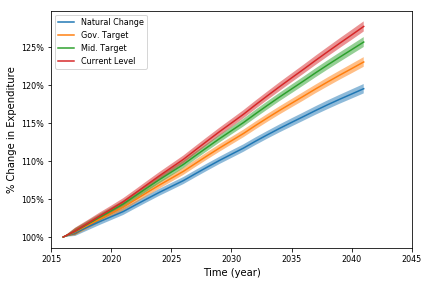

In [121]:
fig, ax = plt.subplots()
for i in range(len(immigration_scenarios_numbers)):
    NHS_cost = NHS_cost_scenarios[i]
    NHS_std_dev = total_NHS_cost_std_dev_scenarios[i]
    x_axis = []
    for j in range(x+1):
        x_axis.append(2016+j)
    plt.xlim(2015, 2045)
    plt.xlabel("Time (year)")
    plt.ylabel("% Change in Expenditure")

    lower = (
            (1+(np.array(NHS_cost)-NHS_cost[0])/NHS_cost[0]) -
            (1.96 * NHS_std_dev) /
            NHS_cost[0])

    upper = (
            (1+(np.array(NHS_cost)-NHS_cost[0])/NHS_cost[0]) +
            (1.96 * NHS_std_dev) /
            NHS_cost[0])

    plt.plot(x_axis,
             (1+(np.array(NHS_cost)-NHS_cost[0])/NHS_cost[0]),
             label=label[i]
             )
    plt.fill_between(x_axis, lower, upper, alpha=0.5)
    plt.gca().set_yticklabels(
            [
                    '{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()
                    ]
            )
#   This is increase in NHS cost due to population growth.
#   Look into NHS cost growth due to other factors
plt.tight_layout()
plt.legend()
plt.savefig(
        "Percentage Change in NHS Cost due to Demographic Change.png",
        dpi=dpi
        )
plt.show()

NHS cost as a function of age

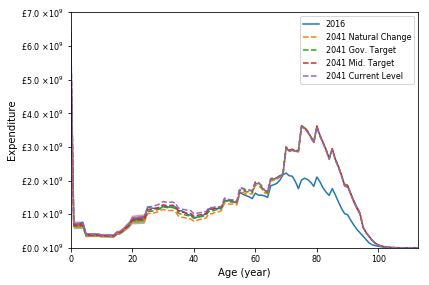

In [122]:
fig, ax = plt.subplots()

plt.plot(
        NHS_cost_per_person[0],
        # color='blue',
        label="2016",
        linestyle="-"
        )

# =============================================================================
# plt.fill_between(
#         np.arange(0, len(NHS_cost_by_age_original)),
#         NHS_cost_by_age_original,
#         0,
#         alpha=0.3
#         )
# =============================================================================

for i in range(len(immigration_scenarios_numbers)):
    NHS_cost_per_person = NHS_cost_pp_scenarios[i]
    NHS_cost_pp_std_dev = NHS_cost_PP_std_dev_scenarios[i]
    formatter = mtick.FuncFormatter(billions)

    lower = NHS_cost_per_person[x] - 1.96 * NHS_cost_pp_std_dev[x]
    upper = NHS_cost_per_person[x] + 1.96 * NHS_cost_pp_std_dev[x]

    ax.yaxis.set_major_formatter(formatter)
    plt.xlim(0, 113)
    plt.ylim(0.0, 7e9)
    plt.plot(
            NHS_cost_per_person[x],
            # color='red',
            label=str(2016+x)+" "+label[i],  # +" "+str(2016+x),
            # linewidth=1,
            linestyle="--"
            )
    plt.fill_between(np.arange(0, 114), lower, upper, alpha=0.5)
    plt.xlabel('Age (year)')
    plt.ylabel("Expenditure")
plt.tight_layout()
plt.legend()
#    plt.title("NHS Cost as a Function of Age")
plt.savefig("NHS Cost as a Function of Age Scenario.png", dpi=dpi)
plt.show()

Initial population 2016

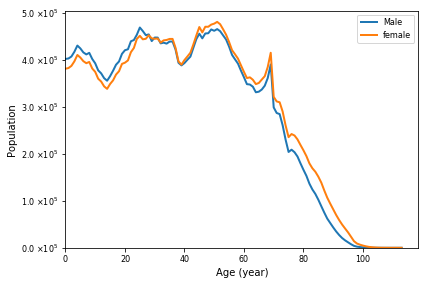

In [123]:
# =============================================================================
# plt.ticklabel_format(
#         style='sci',
#         axis='y',
#         scilimits=(0, 0),
#         useMathText=False
#         )
# =============================================================================

fig, ax = plt.subplots()

plt.plot(
        m_timeseries[0],
        # color='blue',
        label="Male",
        linewidth=2
        )

plt.plot(
        f_timeseries[0],
        # color='red',
        label="female",
        linewidth=2
        )

plt.xlabel('Age (year)')
plt.ylabel("Population")  # $(\mathcal{1x10}^5)$")
ymin, ymax = plt.ylim()
xmin, xmax = plt.xlim()
plt.xlim([0, xmax])
plt.ylim([0, ymax])
plt.legend()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(hunthou))
plt.tight_layout()
plt.savefig("UK Population by Individual Age in 2016.png", dpi=dpi)
plt.show()

year = str(2016+x)  # Set Year of final tabulation as a string

Plot comparing initial population and final population

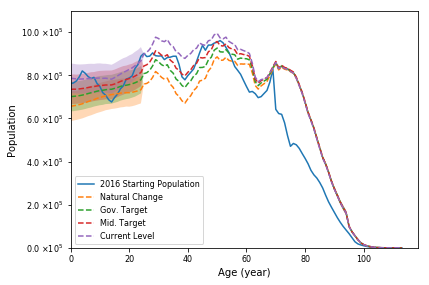

In [124]:
timeseries = timeseries_scenarios[0]
fig, ax = plt.subplots()
plt.plot(
        timeseries[0],
        # color='blue',
        label="2016 Starting Population",
        linestyle="-"
        )

plt.fill_between(np.arange(0, 114), timeseries[0], timeseries[0], alpha=0)

# =============================================================================
# plt.fill_between(
#         np.arange(0, len(timeseries[0])),
#         timeseries[0],
#         0,
#         alpha=0.3
#         )
# =============================================================================

for i in range(len(immigration_scenarios_numbers)):
    timeseries = timeseries_scenarios[i]
    timeseries_std_dev = timeseries_std_dev_scenarios[3]
# =============================================================================
#     plt.ticklabel_format(
#             style='sci',
#             axis='y',
#             scilimits=(0, 0),
#             useMathText=False
#             )
# =============================================================================

    lower = timeseries[x] - 1.96 * timeseries_std_dev[x]
    upper = timeseries[x] + 1.96 * timeseries_std_dev[x]

    ax.errorbar(
            x=np.arange(0, 114),
            y=timeseries[x],
            label=label[i],
            linestyle="--"
            )

    plt.fill_between(np.arange(0, 114), lower, upper, alpha=0.3)

    plt.xlabel('Age (year)')
    plt.ylabel('Population')

    ymin, ymax = plt.ylim()
    xmin, xmax = plt.xlim()
    plt.xlim([0, xmax])
    plt.ylim([0, 1.1e6])

ax.yaxis.set_major_formatter(mtick.FuncFormatter(hunthou))
plt.ylabel("Population")
plt.legend()
plt.tight_layout()
# =============================================================================
# figure.left: 0.4
# =============================================================================
plt.savefig(
        "UK Population by Individual Age Scenario.png",
        dpi=dpi
        )

plt.show()

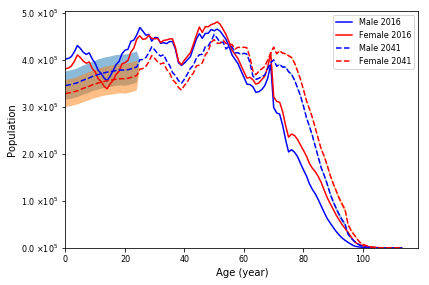

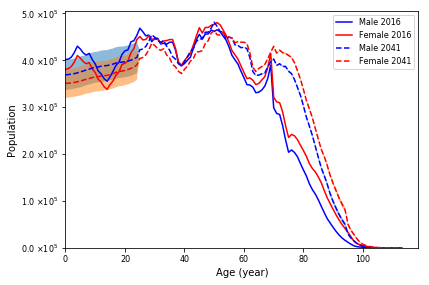

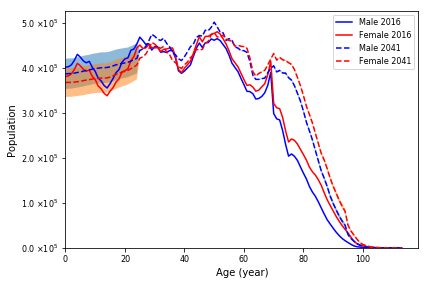

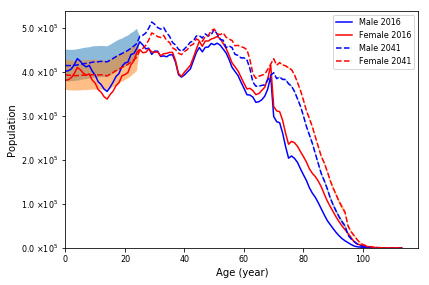

In [125]:
# Plot_Comparing_Initial_Population_and_Final_Population_Split_by_Gender
for i in range(len(immigration_scenarios_numbers)):
    f_timeseries = f_timeseries_scenarios[i]
    m_timeseries = m_timeseries_scenarios[i]

    f_timeseries_std_dev = f_timeseries_std_dev_scenarios[i]
    m_timeseries_std_dev = m_timeseries_std_dev_scenarios[i]

# =============================================================================
#     plt.ticklabel_format(
#             style='sci',
#             axis='y',
#             scilimits=(0, 0),
#             useMathText=False
#             )
# =============================================================================

    fig, ax = plt.subplots()

    plt.plot(
            m_timeseries[0],
            color='blue'
            )

    plt.plot(
            f_timeseries[0],
            color='red'
            )

    plt.plot(
            m_timeseries[x],
            color='blue',
            linestyle='dashed'
            )

    plt.plot(
            f_timeseries[x],
            color='red',
            linestyle='dashed'
            )

    lower = m_timeseries[x] - 1.96 * m_timeseries_std_dev[x]
    upper = m_timeseries[x] + 1.96 * m_timeseries_std_dev[x]

    plt.fill_between(range(0, 114), lower, upper, alpha=0.5)

    lower = f_timeseries[x] - 1.96 * f_timeseries_std_dev[x]
    upper = f_timeseries[x] + 1.96 * f_timeseries_std_dev[x]

    plt.fill_between(range(0, 114), lower, upper, alpha=0.5)

    plt.xlabel("Age (year)")
    plt.ylabel("Population")  # $(\mathcal{1x10}^5)$')
#    plt.title('UK Population by Individual Age Split by Gender')

    blue_line = mlines.Line2D(
            [],
            [],
            color='blue',
            label='Male 2016'
            )

    red_line = mlines.Line2D(
            [],
            [],
            color='red',
            label='Female 2016'
            )

    blue_dash_line = mlines.Line2D(
            [],
            [],
            color='blue',
            linestyle='dashed',
            label='Male '+year
            )

    red_dash_line = mlines.Line2D(
            [],
            [],
            color='red',
            linestyle='dashed',
            label='Female '+year
            )

    ymin, ymax = plt.ylim()
    xmin, xmax = plt.xlim()
    plt.xlim([0, xmax])
    plt.ylim([0, ymax])
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(hunthou))
    plt.legend(
            handles=[
                    blue_line,
                    red_line,
                    blue_dash_line,
                    red_dash_line
                    ]
            )
    plt.tight_layout()
    plt.savefig(
            "UK Population by Individual Age Split by Gender Scenario " +
            label[i] +
            ".png",
            dpi=dpi
            )
    plt.show()

# =============================================================================
# title_list = ["Assuming No Immigration",
#               "Assuming Net Immigration is Reduced to the Tens of Thousands",
#               "Assuming Immigration Continues at Current Level"]
# =============================================================================

In [126]:
count = 0
for result in result_list:
    years = []
    for year in result['Year'].unique():
        years.append(year)

    sexes = []
    for sex in result['Sex'].unique():
        sexes.append(sex)
#   years = np.arange(2016,(2016+x)).tolist()
#   sexes = ['Male', 'Female']
    columns = []
    for year in years:
        for sex in sexes:
            dataset_by_year = result[result['Year'] == int(year)]
            dataset_by_year_and_sex = dataset_by_year[
                    dataset_by_year['Sex'] == sex]
            for col_name in dataset_by_year_and_sex:

                column_name = '{year}_{sex}_{header}_pop_pyramid_grid'.format(
                        year=year, sex=sex, header=col_name
                        )

                a_column = Column(
                        list(dataset_by_year_and_sex[col_name]),
                        column_name
                        )
                columns.append(a_column)

#   upload grid
    grid = Grid(columns)

    url = py.grid_ops.upload(
            grid,
            'gapminder_grid1' + str(time.time()),
            auto_open=False
            )

    url

    figure = {
            'data': [],
            'layout': {'barmode': 'overlay'},
            'frames': [],
            'config': {'scrollzoom': True},
            'autosize': False,
            }

    labels = [
            "800k",
            "600k",
            "400k",
            "200k",
            "0",
            "200k",
            "400k",
            "600k",
            "800k"
            ]

    values = [
            -800e3,
            -600e3,
            -400e3,
            -200e3,
            0,
            200e3,
            400e3,
            600e3,
            800e3
            ]

#   fill in most of layout
    figure['layout']['xaxis'] = {
            'title': 'Population',
            'gridcolor': '#FFFFFF',
            'range': [-8e5, 8e5],
            'ticktext': labels,
            'tickvals': values
            }

    figure['layout']['yaxis'] = {
            'title': 'Age',
            'type': 'linear',
            'gridcolor': '#FFFFFF'}

    figure['layout']['hovermode'] = 'closest'
    figure['layout']['plot_bgcolor'] = 'rgb(223, 232, 243)'

    figure['layout']['title'] = (
            "Population Pyramid of the UK " + label[count]
            )

    figure['layout']['sliders'] = {
            'active': 0,
            'yanchor': 'top',
            'xanchor': 'left',
            'currentvalue': {
                    'font': {'size': 20},
                    'prefix': 'text-before-value-on-display',
                    'visible': True,
                    'xanchor': 'right'},
            'transition': {
                    'duration': 300,
                    'easing': 'cubic-in-out'},
            'pad': {'b': 10,
                    't': 50},
            'len': 0.9,
            'x': 0.1,
            'y': 0,
            'steps': [...]}

    sliders_dict = {
            'active': 0,
            'yanchor': 'top',
            'xanchor': 'left',
            'currentvalue': {
                    'font': {'size': 20},
                    'prefix': 'Year:',
                    'visible': True,
                    'xanchor': 'right'},
            'transition': {
                    'duration': 300,
                    'easing': 'cubic-in-out'},
            'pad': {
                    'b': 10,
                    't': 50},
            'len': 0.9,
            'x': 0.1,
            'y': 0,
            'steps': []}

    figure['layout']['updatemenus'] = [{
            'buttons': [
                    {
                            'args': [
                                    None,
                                    {'frame': {
                                            'duration': 500,
                                            'redraw': True
                                            },
                                        'fromcurrent': True,
                                        'transition': {
                                                'duration': 300,
                                                'easing': 'quadratic-in-out'
                                                }
                                     }
                                        ],
                            'label': 'Play',
                            'method': 'animate'},
                    {
                            'args': [[None],
                                     {'frame': {
                                             'duration': 0,
                                             'redraw': True},
                                      'mode': 'immediate',
                                      'transition': {'duration': 0}
                                      }
                                     ],
                            'label': 'Pause',
                            'method': 'animate'
                            }
                ],
            'direction': 'left',
            'pad': {'r': 10, 't': 87},
            'showactive': False,
            'type': 'buttons',
            'x': 0.1,
            'xanchor': 'right',
            'y': 0,
            'yanchor': 'top'
            }
                ]

    custom_colors = {
            'Male': 'rgb(99, 110, 250)',
            'Female': 'rgb(230, 99, 250)'}

    col_name_template = '{year}_{sex}_{header}_pop_pyramid_grid'
    year = 2016
    for sex in sexes:
        data_dict = go.Bar(
                xsrc=grid.get_column_reference(
                        col_name_template.format(
                                year=year,
                                sex=sex,
                                header='Pop'
                                )
                        ),
                ysrc=grid.get_column_reference(
                        col_name_template.format(
                                year=year,
                                sex=sex,
                                header='Age'
                                )
                        ),
                textsrc=grid.get_column_reference(
                        col_name_template.format(
                                year=year,
                                sex=sex,
                                header='abs_pop'
                                )
                        ),
                marker={'color': custom_colors[sex]},
                name=sex,
                orientation='h',
                hoverinfo='text')

        figure['data'].append(data_dict)

    for year in years:
        frame = {'data': [], 'name': str(year)}
        for sex in sexes:
            data_dict = go.Bar(
                    xsrc=grid.get_column_reference(
                            col_name_template.format(
                                    year=year,
                                    sex=sex,
                                    header='Pop'
                                    )
                            ),
                    ysrc=grid.get_column_reference(
                            col_name_template.format(
                                    year=year,
                                    sex=sex,
                                    header='Age'
                                    )
                            ),
                    marker={'color': custom_colors[sex]},
                    name=sex,
                    orientation='h',
                    hoverinfo='text')

            frame['data'].append(data_dict)

        figure['frames'].append(frame)
        slider_step = {
                'args': [
                        [year],
                        {
                                'frame': {
                                        'duration': 300,
                                        'redraw': True},
                                'mode': 'immediate',
                                'transition': {'duration': 300}
                                }
                                ],
                'label': year,
                'method': 'animate'
                }

        sliders_dict['steps'].append(slider_step)

    figure['layout']['sliders'] = [sliders_dict]
    py.icreate_animations(
            figure,
            'population_pyramid' + str(count) + str(time.time())
            )

    count += 1

UK Population Pyramids

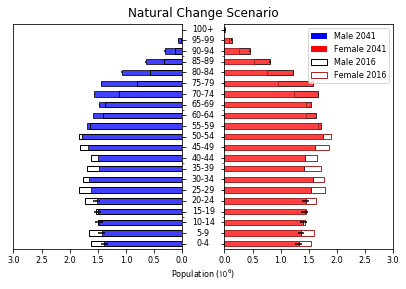

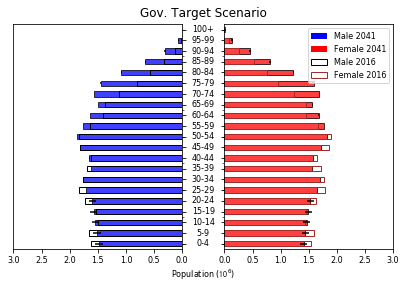

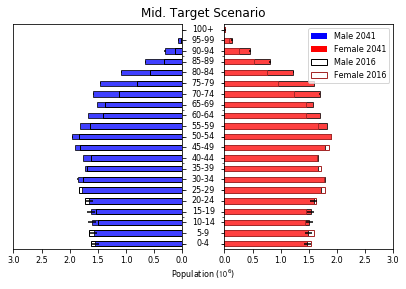

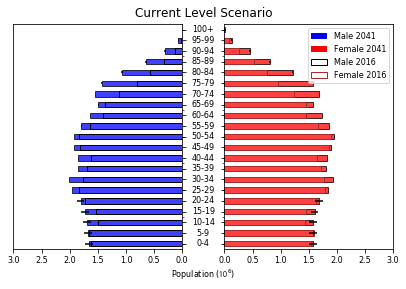

In [127]:
for j in range(len(immigration_scenario)):
    pyramid_list = pyramid_scenario_list[j]
    m_trunk_std_dev = m_trunk_std_dev_scenarios[j]
    f_trunk_std_dev = f_trunk_std_dev_scenarios[j]
    for i in [int(x)]:  # [0, int(x/4), int(x/2), int(3*x/4), int(x)]:
        year = str(2016+i)
        fig, axes = plt.subplots(ncols=2, sharey=True)

        pyramid_dataframe = pd.DataFrame(
                pyramid_list[i],
                columns=[
                        'Age Group',
                        'Male',
                        'Female',
                        ]
                )

        m_errors = 1.96 * m_trunk_std_dev[i]
        f_errors = 1.96 * f_trunk_std_dev[i]

        pyramid_dataframe.plot.barh(
                x='Age Group',
                y='Male',
                color='blue',
                edgecolor='None',
                label='Male',
                legend=True,
                alpha=0.75,
                ax=axes[0],
                xerr=m_errors
                )

        pyramid_dataframe.plot.barh(
                x='Age Group',
                y='Female',
                color='red',
                edgecolor='None',
                label='Female',
                legend=True,
                alpha=0.75,
                ax=axes[1],
                xerr=f_errors
                )

        pyramid_dataframe_original = pd.DataFrame(
                pyramid_list[0],
                columns=[
                        'Age Group',
                        'Male',
                        'Female',
                        # 'Male_std_err',
                        ]
                )

        pyramid_dataframe_original.plot.barh(
                x='Age Group',
                y='Male',
                color='None',
                edgecolor='black',
                linewidth=1,
                label='Male 2016',
                legend=True,
                ax=axes[0]
                )

        pyramid_dataframe_original.plot.barh(
                x='Age Group',
                y='Female',
                color='None',
                edgecolor='brown',
                linewidth=1,
                label='Female 2016',
                legend=True,
                ax=axes[1]
                )

        axes[0].set(yticklabels=[])
        axes[0].yaxis.tick_right()

        for i in range(2):
            axes[i].set_xlim([0, 3e6])
        axes[0].invert_xaxis()
        y_axis = axes[0].get_yaxis()
        y_axis.set_label_text('foo')
        y_label = y_axis.get_label()
        y_label.set_visible(False)

        for i in range(len(age_groups)):
            axes[0].annotate(
                    age_groups[i],
                    (0.5, i),
                    xycoords=(
                            'figure fraction',
                            'data'
                            ),
                    ha='center',
                    va='center'
                    )

        for ax in axes.flat:
            ax.margins(0.03)

        fig.tight_layout()

        fig.subplots_adjust(
                top=0.92,
                bottom=0.14,
                wspace=0.25
                )

        # fig.suptitle('UK Population Pyramid '+year)
        fig.suptitle(label[j]+" Scenario")
        fig.text(0.5, 0.04, r'Population $(\mathcal{10}^6)$', ha='center')
        axes[0].get_xaxis().set_major_formatter(mtick.FuncFormatter(millions))
        axes[1].get_xaxis().set_major_formatter(mtick.FuncFormatter(millions))
        axes[0].legend_.remove()
        axes[1].legend_.remove()

        blue_patch = mpatches.Patch(
                facecolor='blue',
                edgecolor='None',
                label='Male '+year
                )

        red_patch = mpatches.Patch(
                facecolor='red',
                edgecolor='None',
                label='Female '+year
                )

        black_patch = mpatches.Patch(
                edgecolor='black',
                linewidth=1,
                facecolor='None',
                label='Male 2016'
                )

        brown_patch = mpatches.Patch(
                edgecolor='brown',
                linewidth=1,
                facecolor='None',
                label='Female 2016'
                )

        axes[1].legend(
                handles=[
                        blue_patch,
                        red_patch,
                        black_patch,
                        brown_patch
                        ]
                )

        plt.savefig(
                "UK Population by Individual Age Split by Gender Scenario " +
                label[j] +
                year +
                ".png",
                dpi=dpi
                )
        plt.show()
# =============================================================================
#     plotly_fig = tls.mpl_to_plotly(fig)
#     py.iplot(plotly_fig, filename='popultion pyramid')
# =============================================================================

Information about the change in total size of UK population

In [128]:
print(
    "The Size of the UK Population in 2016 is",
    "{:.2e}".format(sum(timeseries[0]))
)

print(
    "The Size of the UK Population in",
    str(2016+x),
    "is",
    "{:.2e}".format(sum(timeseries[x])) + "\n"
)

print(
    "With a % change of",
    "{:.2%}".format((
        sum(timeseries[x]) -
        sum(timeseries[0])) /
        sum(timeseries[0])),
    "\n"
)

The Size of the UK Population in 2016 is 6.65e+07
The Size of the UK Population in 2041 is 7.54e+07

With a % change of 13.33% 



The initial population of the uk is:  65647894.70568846 
The final population of the UK is:  67149676.81585592  +/-  346370.3302562709 

The initial population of the uk is:  65647894.70568846 
The final population of the UK is:  70232308.05497882  +/-  345961.3377259911 

The initial population of the uk is:  65647894.70568846 
The final population of the UK is:  72531895.51843737  +/-  358619.2704802644 

The initial population of the uk is:  65647894.70568846 
The final population of the UK is:  75114570.58316562  +/-  370527.03664540057 



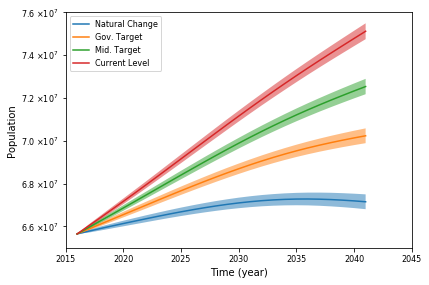

In [129]:
x_axis = []
for i in range(x+1):
    x_axis.append(2016+i)

fig, ax = plt.subplots()
for j in range(len(immigration_scenario)):
    total_pop_avg = total_pop_avg_scenarios[j]
    total_pop_std_dev = total_pop_std_dev_scenarios[j]
    x_axis = []
    
    for i in range(x+1):
        x_axis.append(2016+i)

    lower = total_pop_avg - 1.96 * total_pop_std_dev
    upper = total_pop_avg + 1.96 * total_pop_std_dev

    plt.fill_between(x_axis, lower, upper, alpha=0.5)

    plt.plot(
            x_axis,
            total_pop_avg,
            label=label[j]
            )

    plt.xlabel("Time (year)")
    plt.ylabel("Population")

    print(
        "The initial population of the uk is: ",
        total_pop_avg[0],
        "\n"+
        "The final population of the UK is: ",
        total_pop_avg[x],
        " +/- ",
        (1.96 * total_pop_std_dev[x]), "\n"
    )

ax.yaxis.set_major_formatter(mtick.FuncFormatter(tentoseventhpower))
plt.xlim(2015, 2045)
plt.ylim(65e6, 76e6)
plt.legend()
plt.tight_layout()
plt.savefig("Total population projection for each scenario.png", dpi=600)
plt.show()

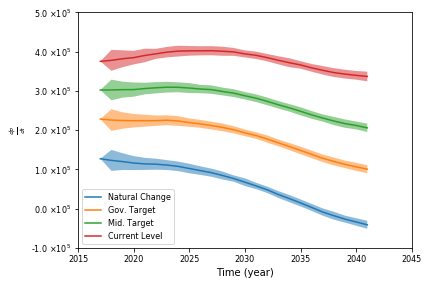

In [130]:
x_axis = []
for i in range(x):
    x_axis.append(2017+i)

dx = 1
fig, ax = plt.subplots()
for j in range(len(immigration_scenario)):
    total_pop_avg = total_pop_avg_scenarios[j]
    total_pop_std_dev = total_pop_std_dev_scenarios[j]
    dy = diff(total_pop_avg)/dx

# =============================================================================
#     plt.ticklabel_format(
#             style='sci',
#             axis='y',
#             scilimits=(0, 0),
#             useMathText=False
#             )
# =============================================================================

    lower = total_pop_avg - 1.96 * total_pop_std_dev
    upper = total_pop_avg + 1.96 * total_pop_std_dev

    lower_dy = diff(lower)/dx
    upper_dy = diff(upper)/dx

    lower_dy[0] = dy[0]
    upper_dy[0] = dy[0]

    plt.fill_between(
            x_axis,
            lower_dy,
            upper_dy,
            alpha=0.5
            )

    plt.plot(
            x_axis,
            dy,
            label=label[j]
            )

plt.legend()
plt.grid = True
plt.xlim(2015, 2045)
plt.ylim(-100000, 500000)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(hunthou))
plt.xlabel("Time (year)")
plt.ylabel(r"$\mathcal{\frac{dp}{dt}}$")
plt.tight_layout()
plt.savefig(
        "Differential of Total population projection for each scenario.png",
        dpi=600
        )

plt.show()

Print Summary Statistics

In [131]:
m_mean_scenarios = []
f_mean_scenarios = []
for j in range(len(immigration_scenario)):
    m_mean = []
    f_mean = []
    m_timeseries = m_timeseries_scenarios[j]
    f_timeseries = f_timeseries_scenarios[j]
    count = 0
    for gender in [m_timeseries, f_timeseries]:
        for k in range(x+1):
            age = 0
            temp_mean = 0
            for i in gender[k]:
                temp_mean += i*age
                age += 1
            if count == 0:
                m_mean.append(temp_mean/sum(gender[k]))
            else:
                f_mean.append(temp_mean/sum(gender[k]))
        count += 1
    m_mean_scenarios.append(m_mean)
    f_mean_scenarios.append(f_mean)

print("The mean male age of the UK Population in 2016 is", m_mean[0])
print("The mean female age of the UK Population in 2016 is", f_mean[0], "\n")

for j in range(len(immigration_scenario)):
    m_mean = m_mean_scenarios[j]
    f_mean = f_mean_scenarios[j]

    print(
        "The mean male age of the UK Population in 2041 is for" +
        "scenario: " + label[j],
        m_mean[x]
    )

    print(
        "The mean female age of the UK Population in 2041 is for" +
        "scenario: " + label[j],
        f_mean[x],
        "\n"
    )

print("The Total NHS Expenditure in 2016 is: ", NHS_net_expenditure)

# print(
#   "The Total NHS Expenditure in 2016 should be: ",
#   sum(NHS_cost_per_person[0])
# )

# print(
#     "Proportional difference = ",
#     (sum(NHS_cost_per_person[0])-NHS_net_expenditure)/NHS_net_expenditure
# )

print(
    "The Total NHS Expenditure in ",
    str(2016+x),
    "is",
    sum(NHS_cost_per_person[x]),
    "\n"
)

print(
    "This is a change of ",
    "{:.2%}".format((
        sum(NHS_cost_per_person[x]) -
        sum(NHS_cost_per_person[0])) /
        sum(NHS_cost_per_person[0])
    ),
    "\n"
)

millnames = ['', ' Thousand', ' Million', ' Billion', ' Trillion']


def millify(n):
    n = float(n)
    millidx = max(0, min(
            len(millnames)-1,
            int(math.floor(0 if n == 0 else math.log10(abs(n))/3)))
    )

    return '{:.0f}{}'.format(n / 10**(3 * millidx), millnames[millidx])


for i in range(len(immigration_scenario)):
    total_NHS_cost = total_NHS_cost_scenarios[i]
    total_NHS_cost_std_dev = total_NHS_cost_std_dev_scenarios[i]
    print(
            "The Total NHS Expenditure in 2041, " + label[i] + " is:",
            '%20s' % (millify(total_NHS_cost[x])),
            " +/- ",
            (1.95 * total_NHS_cost_std_dev[x])
            )

end_time = time.time()
time_taken = end_time - start_time  # time_taken is in seconds
hours, rest = divmod(time_taken, 3600)
minutes, seconds = divmod(rest, 60)

print("\n" + "minutes: ", minutes, "seconds: ", seconds)

The mean male age of the UK Population in 2016 is 38.99111779048523
The mean female age of the UK Population in 2016 is 40.9363182447107 

The mean male age of the UK Population in 2041 is forscenario: Natural Change 43.32620458221141
The mean female age of the UK Population in 2041 is forscenario: Natural Change 45.08523131762165 

The mean male age of the UK Population in 2041 is forscenario: Gov. Target 42.90167235790135
The mean female age of the UK Population in 2041 is forscenario: Gov. Target 44.592941468527115 

The mean male age of the UK Population in 2041 is forscenario: Mid. Target 42.60845350518033
The mean female age of the UK Population in 2041 is forscenario: Mid. Target 44.251077936067475 

The mean male age of the UK Population in 2041 is forscenario: Current Level 41.74227912400626
The mean female age of the UK Population in 2041 is forscenario: Current Level 43.653032681332725 

The Total NHS Expenditure in 2016 is:  120512000000.0
The Total NHS Expenditure in  2041